In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculating Res-Permeability using Data : Well Test Analysis

> NumPy | Plotting | Domain Concepts | Reservoir-Engineering

### Pwf = Pi - m[log(t) + C] 

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Petroleum-DS-ML-with-Python/main/Pt.csv')

In [83]:
df

,time,pressure
0,0.0010,2743.96
1,0.0021,2737.52
2,0.0034,2730.16
3,0.0048,2722.32
4,0.0064,2713.83
...,...,...
73,48.7900,2269.77
74,54.7900,2267.69
75,60.7900,2265.73
76,66.7900,2264.46


### A. Cartesian Analysis : Tells what kind of test is it.

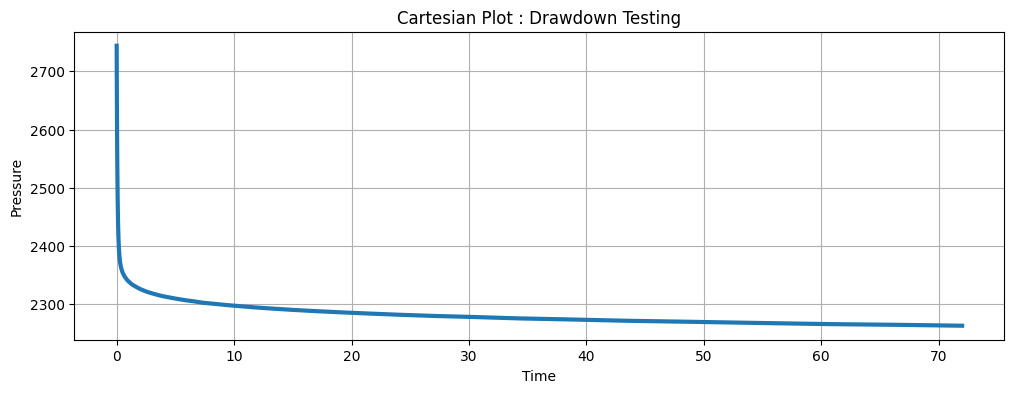

In [84]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.plot(df['time'], df['pressure'],lw=3)

plt.xlabel('Time') ; plt.ylabel('Pressure')

plt.title('Cartesian Plot : Drawdown Testing')
plt.grid()


### B. Semilog Analysis : High level searching for MTR.

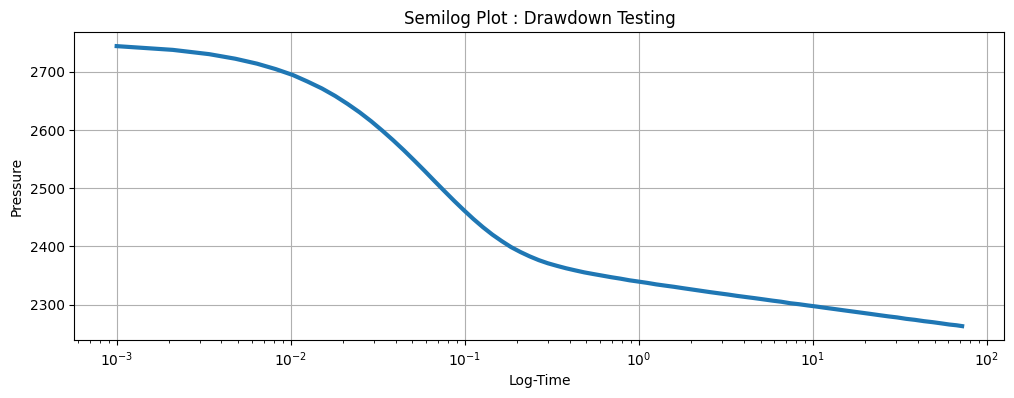

In [85]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],lw=3)

plt.xlabel('Log-Time') ; plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')
plt.grid()

### C. Log-Log Plot : Computations.

In [86]:
Pi = 2760 #psi Given

df['delP'] = np.abs(Pi - df['pressure'])

#note that np.diff(P) does what we call as 'dP' in 'dP/dt'. 
#But it reduces one element.
df['d(delP)'] = np.zeros(len(df))
df['d(delP)'].iloc[1:] = np.abs(np.diff(df['delP']))


df['dt'] = np.zeros(len(df))
df['dt'].iloc[1:] = np.diff(df['time'])


#P' (Pdash) = t*dP/dt
df['Pdash'] = np.zeros(len(df))
df['Pdash'].iloc[1:] = df['time']*df['d(delP)']/df['dt']






df.head()

,time,pressure,delP,d(delP),dt,Pdash
0,0.0010,2743.96,16.04,0.00,0.0000,0.000000
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000


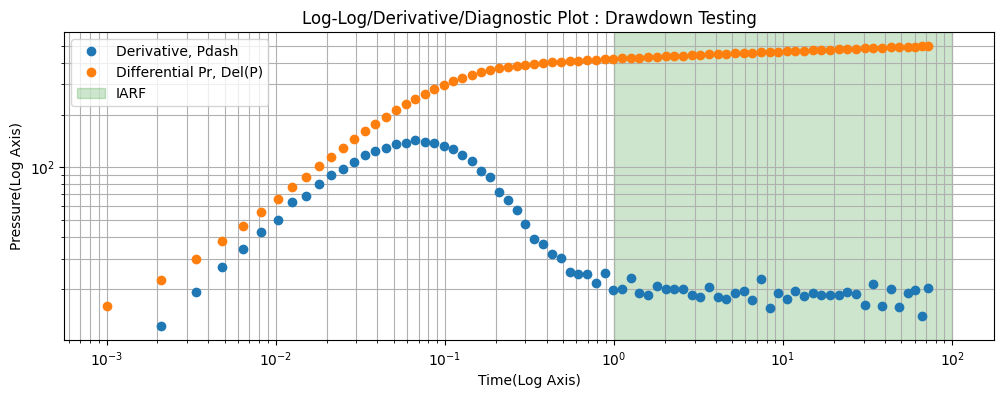

In [87]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.loglog(df['time'], df['Pdash'],'o',label='Derivative, Pdash')
plt.loglog(df['time'], df['delP'],'o',label='Differential Pr, Del(P)')

plt.axvspan(1,100,color='green',alpha=0.2,label='IARF')

plt.xlabel('Time(Log Axis)') ; plt.ylabel('Pressure(Log Axis)')

plt.title('Log-Log/Derivative/Diagnostic Plot : Drawdown Testing')


plt.legend()
plt.grid(True, which="both")

In [44]:
df[df['time']>1]['pressure'].mean()

2298.7667567567564

In [45]:
tmin_iarf = 1 #hr
tmax_iarf = 50 #hrs

In [46]:
# plt.style.use('default')
# plt.figure(figsize=(12,4))

# plt.scatter(np.log(df['time']), np.log(df['Pdash']),lw=3)
# plt.scatter(np.log(df['time']), np.log(df['delP']),lw=3)

# plt.xlabel('Log-Time') ; plt.ylabel('Log-Pressure')

# plt.title('Log-Log Plot : Drawdown Testing')


# plt.grid()

### D. Semi-Log Plot for IARF MTR only

In [88]:
df_semilog = df[(df['time']>=tmin_iarf) & (df['time'] <= tmax_iarf)]

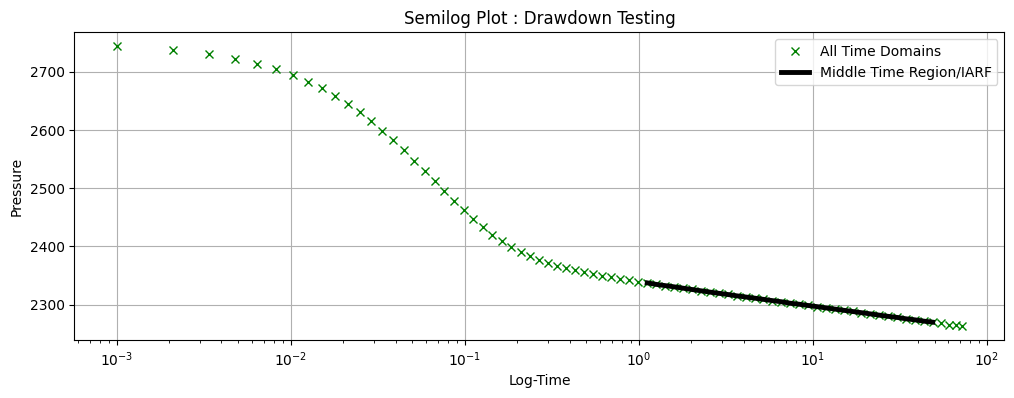

In [59]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],'x',color='green',label='All Time Domains')
plt.semilogx(df_semilog['time'], df_semilog['pressure'],color='black',lw=3.5,label='Middle Time Region/IARF')

plt.xlabel('Log-Time') ; plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')

plt.legend()
plt.grid()

## CONCLUSION : Finding Permeability.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


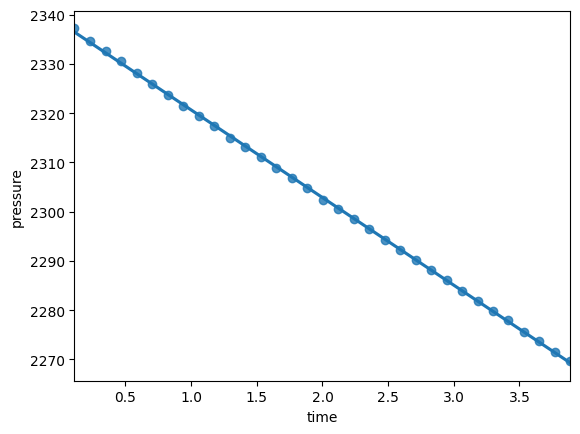

In [61]:
t = np.log(df_semilog['time'])
P = df_semilog['pressure']


sns.regplot(t,P)

In [62]:
#Polyfit
np.polyfit(t,P,1)

array([ -17.7869321 , 2338.42912687])

In [63]:
[slope,intercept]=np.polyfit(t,P,1)

In [65]:
abs(slope)

17.786932104989376

In [66]:
m = abs(slope)

## $ m = 162.6 \frac {q \mu B} {k h} $

In [69]:
q = 125 #stb/d
mu = 2.1 #cp
B = 1.14 #rb/Stb
h = 50 #ft

k = 162.6*q*mu/m/h

print(f'Formation Permeability is : {np.round(k,2)} miliDarcies')

Formation Permeability is : 47.99 miliDarcies


And that's how you calculate Permeability using a Well Test.

# 2. Calculationg Reserves & Forecasts with Data : DCA

In [70]:
dca_df = pd.read_csv('https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/master/data/norne_production_rate_sample.csv',
                     index_col = 0 , parse_dates = True)

dca_df.head()

,Rate (SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


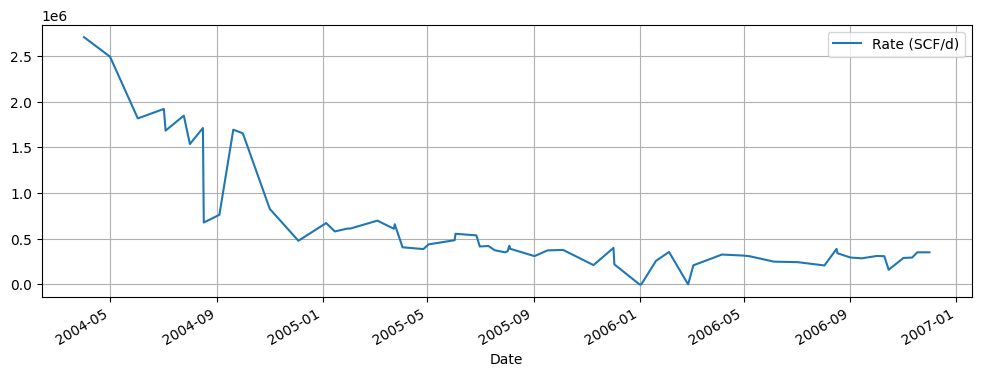

In [71]:
dca_df.plot(figsize=(12,4))
plt.grid()

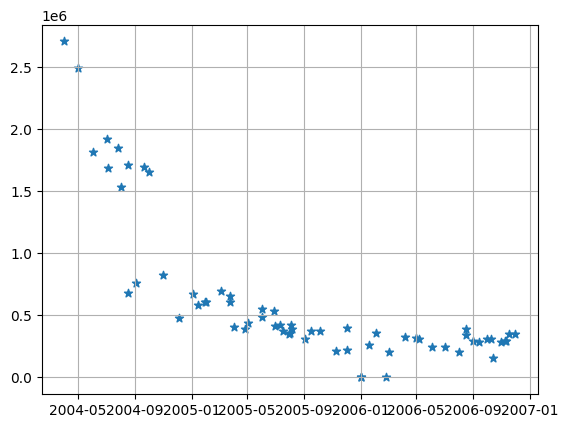

In [72]:
plt.scatter(y=dca_df['Rate (SCF/d)'],x=dca_df.index,marker='*')

# plt.ylabel('Rate (SCF/d)')
plt.grid()

In [73]:
def day_maker(df):
    
    '''
    Pass a Time-Series DataFrame to it and it will
    return a days column. Subtracts dates and makes days. 
    
    Returned is a days (np array).
    '''
    
    days = []

    for d in range(len(df)):
    
        delta = df.index[d] - df.index[0]
    
        days.append(delta.days)
    
    days = np.array(days)
    
    return days

In [74]:
dca_df['days'] = day_maker(dca_df)

In [75]:
dca_df.head()

,Rate (SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


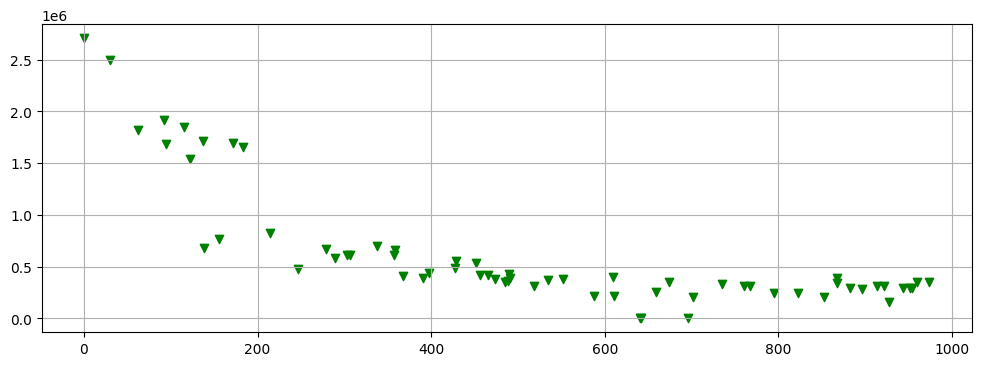

In [76]:
plt.figure(figsize=(12,4))
plt.scatter(y=dca_df['Rate (SCF/d)'],x=dca_df['days'],marker='v',color='green')

# plt.ylabel('Rate (SCF/d)')
plt.grid()

In [77]:
from scipy.optimize import curve_fit

In [78]:
def q_hyp(t,qi,b,d):
    
    qfit = qi/(np.abs((1 + b * d* t))**(1/b))
    
    return qfit


def hyp_fitter(q,t):
        
    #First we have to Normalize so that it converges well and quick.
    q_n = q/max(q)
    t_n = t/max(t)
    
    #curve-fit (optimization of parameters)
    params = curve_fit(q_hyp,t_n,q_n)
    [qi,b,d] = params[0]
    
    #These are for normalized t and q. 
    #We must re-adjust for q and t (non-normalized)
    d_f = d/max(t)
    qi_f = qi*max(q)
    
    #Now we can use these parameters. 
    q_hyp_fit = q_hyp(t,qi_f,b,d_f)
    
    return q_hyp_fit,params

In [79]:
q = dca_df['Rate (SCF/d)'] ; t = dca_df['days']
q_fit ,params = hyp_fitter(q,t)

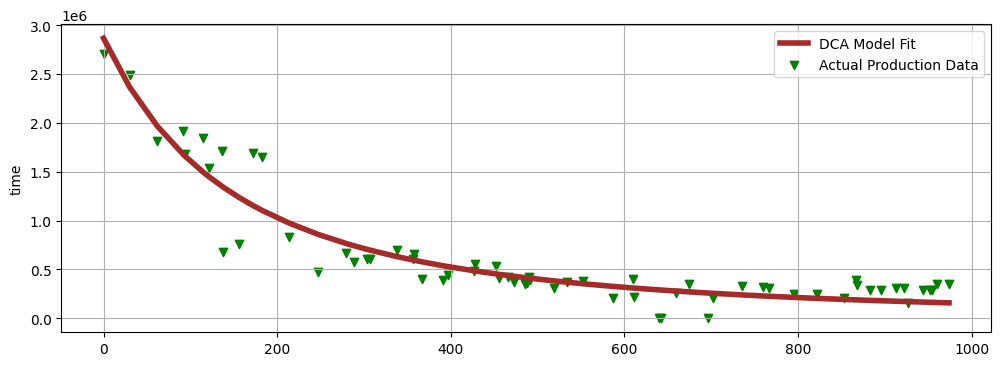

In [80]:
plt.figure(figsize=(12,4))
plt.scatter(t,q,marker='v',color='green',label='Actual Production Data')
plt.plot(t,q_fit,color='brown',lw=4,label='DCA Model Fit')

plt.ylabel(df.columns[0])

plt.grid()
plt.legend()

Reserves calculation : Numerical Integration : Trapezoidal Rule

In [90]:
q

Date
2004-04-01    2706039.00
2004-05-01    2492086.20
2004-06-02    1816846.10
2004-07-02    1920207.40
2004-07-04    1683521.40
                 ...    
2006-11-01     289382.91
2006-11-09     293290.66
2006-11-11     293359.31
2006-11-17     351398.16
2006-12-01     351398.16
Name: Rate (SCF/d), Length: 64, dtype: float64

In [91]:
q_fit

Date
2004-04-01    2.866266e+06
2004-05-01    2.367275e+06
2004-06-02    1.966120e+06
2004-07-02    1.675941e+06
2004-07-04    1.658923e+06
                  ...     
2006-11-01    1.658027e+05
2006-11-09    1.636889e+05
2006-11-11    1.631667e+05
2006-11-17    1.616152e+05
2006-12-01    1.580799e+05
Name: days, Length: 64, dtype: float64

In [89]:
from sklearn.metrics import mean_squared_error as mse

Notice that in this DCA technique (Physics base, Arps) we MUST know the equation prior to the project. We need that info otherwise we cannot do anything.
Whereas in Data Driven approaches, we normally start with ONLY DATA and fit the model that suits the best, use this model for Production Forecasting.